# `clust-learn` - Module 4: Classifier 分类

This guide shows how to use the `classifier` module of the `clust-learn` package to fit a classification model to further explain the clustres previously obtained.

本指南展示了如何使用clust-learn包中的classifier模块来拟合一个分类模型，以进一步解释之前获得的聚类。

Note this module can also be used independently to fit a classification model for data that is not necessarily the output of clustering.

注意，这个模块也可以独立使用，用于拟合一个分类模型，数据不一定是聚类的输出。

## 0. Setup

In [49]:
import numpy as np
import pandas as pd

from clearn.classifier import Classifier

pd.set_option('display.max_columns', None)

## 1. Data loading

Original dataset with corresponding cluster labels.

包含相应聚类标签的原始数据集。

In [50]:
df = pd.read_csv('data_HKG/data_香港_modified_preprocessed_clustered_output.csv')
df.head()

,ASDAGE,ASRREA,ASRLIT,ASRINF,ASRIIE,ASRRSI,ASBGSEC,ASBGSSB,ASBGSB,ASBGERL,ASBGDRL,ASBGSLR,ASBGSCR,ASBGHRL,ASBHSES,ASBHELA,ASBHENA,ASBHELN,ASBHELT,ASBHPCS,ASBHPLR,ACBG09,ACBG15,ACBG16,ACBGRRS,ACBGEAS,ACBGDAS,ACDGTIHY,ATBG01,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBGEAS,ATBGSOS,ATBGTJS,ATBGSLI,ATDGLIHY,ATDGRIHY,ITSEX,ASRIBM,ASBG03,ASBG05A,ASBG05B,ASBG05E,ASBG05F,ASBG05G,ASBG05H,ASBG05I,ASBG05J,ASBG05K,ASBG06,ASBG07A,ASBG07B,ASBG08A,ASBG08B,ASBG10F,ASBR03A,ASBR03B,ASBR03C,ASBR04,ASBR05,ASDGSEC,ASDGSSB,ASDGSB,ASDGERL,ASDGDRL,ASDGSLR,ASDGSCR,ASDG05S,ASBH02A,ASBH02B,ASBH03A,ASBH03B,ASBH03C,ASBH03D,ASBH03E,ASBH04,ASBH06,ASBH07F,ASBH09,ASBH14A,ASBH14B,ASBH14C,ASBH16,ASBH18AA,ASBH18AB,ASBH18BA,ASBH18BB,ASBH18CA,ASBH18CB,ASBH18DA,ASBH18DB,ASBH18EA,ASBH18EB,ASBH19,ASBH20A,ASBH20B,ASBH20C,ASBH21A,ASBH21B,ASBH21C,ASBH21D,ASBH22,ASDGHRL,ASDHSES,ASDHELA,ASDHENA,ASDHELN,ASDHELT,ASDHPCS,ASDHPLR,ASDHAPS,ASDHEDUP,ASDHOCCP,ACBG04,ACBG05A,ACBG05B,ACBG07B,ACBG07C,ACBG08,ACBG13,ACBG14A,ACBG14B,ACBG14C,ACBG14D,ACBG14E,ACBG14F,ACBG14G,ACBG14H,ACBG14I,ACBG14J,ACBG14K,ACBG14L,ACBG14M,ACBG14N,ACBG17,ACBG18A,ACBG18B,ACBG18C,ACBG19,ACBG20,ACBG21A,ACBG21B,ACBG21C,ACBG21D,ACBG21E,ACBG21F,ACDGRRS,ACDGEAS,ACDGDAS,ACDGSBC,ATBG02,ATBG03,ATBG05AA,ATBG05AB,ATBG05AC,ATBG05AD,ATBG05BA,ATBG05BB,ATBG05BC,ATBG05BD,ATBG05BE,ATBG05BF,ATBG05BG,ATBG05BH,ATBG05BI,ATBG05BJ,ATBG05BK,ATBG06,ATBG07AA,ATBG07BA,ATBG07AB,ATBG07BB,ATBG07AC,ATBG07BC,ATBG07AD,ATBG07BD,ATBG07AE,ATBG07BE,ATBG07AF,ATBG07BF,ATBG07AG,ATBG07BG,ATBG08A,ATBG08B,ATBG08C,ATBG08D,ATBG08E,ATBG09A,ATBG09B,ATBG09C,ATBG09D,ATBR06A,ATBR06B,ATBR06C,ATBR06D,ATBR06E,ATBR07AA,ATBR07AB,ATBR07AC,ATBR07AD,ATBR07BA,ATBR07BB,ATBR07BC,ATBR07BD,ATBR08A,ATBR08B,ATBR08C,ATBR08D,ATBR08E,ATBR08F,ATBR08G,ATBR08H,ATBR09A,ATBR09B,ATBR09C,ATBR09D,ATBR09E,ATBR09F,ATBR09G,ATBR09H,ATBR09I,ATBR10A,ATBR10B,ATBR10C,ATBR10D,ATBR10E,ATBR10F,ATBR10G,ATBR10H,ATBR10I,ATBR10J,ATBR10K,ATBR10L,ATBR11A,ATBR11B,ATBR11C,ATBR11D,ATBR11E,ATBR12A,ATBR12BA,ATBR12BB,ATBR12BC,ATBR12BD,ATBR12C,ATBR12DA,ATBR12DB,ATBR12DC,ATBR12EA,ATBR12EB,ATBR12EC,ATBR12ED,ATBR12EE,ATBR13A,ATBR13B,ATBR13C,ATBR13D,ATBR13E,ATBR14,ATBR15,ATBR16,ATBR17A,ATBR17B,ATBR17C,ATBR18A,ATBR18B,ATBR18C,ATBR18D,ATBR18E,ATBR19,ATDGEAS,ATDGSOS,ATDGTJS,ATDGSLI,cluster,cluster_cat
0,10.17,613.717610,584.112640,594.488182,585.169606,569.777988,8.12699,8.23773,10.96500,8.05152,9.00419,11.30153,9.39964,10.543370,9.65449,14.77456,15.01872,15.91536,12.79881,12.13203,8.67085,200.0,1.0,1.0,7.37191,9.40492,9.92826,791.66667,25.0,33.0,33.0,0.0,0.0,8.83963,9.42597,8.67953,7.52318,171.0,133.0,1,4,2,1,1,1,2,2,2,1,1,2,4,3,2,2,2,2,1,3,4,2,2,3,2,1,2,2,1,2,2,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,2,4,1,1,1,1,3,2,1,1,4,1,1,1,1,1,1,2,2,1,5,2,3,3,3,3,1,1,2,2,1,1,1,1,1,1,1,2,2,1,1,1,5,1,2,1,2,3,2,3,2,2,2,2,2,2,1,1,2,2,1,2,1,2,1,2,1,2,1,2,2,2,1,2,2,2,2,2,2,2,3,2,2,4,2,3,3,3,4,4,3,2,2,2,3,3,2,3,2,2,2,3,2,3,4,3,2,2,2,2,3,3,1,1,2,2,2,1,1,1,1,1,2,3,3,2,3,3,3,1,1,1,1,1,1,2,1,2,1,2,3,3,4,1,4,2,2,2,2,1,1,3,3,3,1,1,1,1,1,5,3,2,2,2,0,STU_0
1,9.50,627.735796,605.068466,615.884752,615.855200,627.438440,9.51164,12.85262,9.52871,11.54818,9.60657,10.83607,10.28978,10.145864,9.91394,8.91792,10.04897,9.43432,13.91988,12.13203,8.25040,200.0,1.0,1.0,7.37191,9.40492,9.92826,791.66667,25.0,33.0,33.0,0.0,0.0,8.83963,9.42597,8.67953,7.52318,171.0,133.0,2,5,1,1,1,2,1,1,1,2,2,2,5,3,3,2,2,1,2,2,3,1,2,2,1,1,1,2,1,1,2,1,1,1,2,2,2,2,1,3,1,3,1,1,1,5,1,1,2,2,2,2,2,2,2,2,1,2,1,1,1,1,1,1,1,2,2,2,2,2,1,1,2,4,1,1,1,1,3,2,1,1,4,1,1,1,1,1,1,2,2,1,5,2,3,3,3,3,1,1,2,2,1,1,1,1,1,1,1,2,2,1,1,1,5,1,2,1,2,3,2,3,2,2,2,2,2,2,1,1,2,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,2,2,2,2,2,2,3,2,2,4,2,3,3,3,4,4,3,2,2,2,3,3,2,3,2,2,2,3,2,3,4,3,2,2,2,2,3,3,1,1,2,2,2,1,1,1,1,1,2,3,3,2,3,3,3,1,1,1,1,1,1,2,1,2,1,2,3,3,4,1,4,2,2,2,2,1,1,3,3,3,1,1,1,1,1,5,3,2,2,2,2,STU_2
2,9.67,587.833326,580.834606,588.412586,588.788202,608.000922,9.00789,9.82079,9.52871,10.66007,10.98651,12.86202,10.90567,13.046470,11.17158,10.26741,9.21443,9.65595,10.44539,12.13

In [51]:
# 一共有多少类别
print("一共有多少类别:\n", df['cluster'].value_counts())

一共有多少类别:
 cluster
1    657
4    590
3    555
2    510
0    450
5    447
Name: count, dtype: int64


Lower dimensional dataset with corresponding cluster labels.

包含相应聚类标签的降维数据集。


In [52]:
df_red = pd.read_csv('data_HKG/data_香港_modified_preprocessed_dim_red_clustered_output.csv')
df_red.head()

,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,dim_20,dim_21,dim_22,dim_23,dim_24,dim_25,cluster,cluster_cat
0,0.232284,6.056729,-0.638719,1.067916,-0.481940,-2.050250,-1.131900,0.535369,-1.939523,-0.080854,-0.161845,0.035978,0.035308,0.367663,0.330454,0.019381,-0.328657,0.362937,0.074003,-0.061188,0.030063,-0.084625,-0.020265,-0.398475,0.083482,0,STU_0
1,1.532108,0.211149,1.972918,1.215780,-0.870449,-2.024630,-1.123716,0.442376,-1.950118,-0.180942,-0.174406,0.035906,0.055652,0.336604,0.322528,0.035825,-0.316983,0.367125,0.056851,-0.073813,0.011380,-0.055304,0.010729,-0.358706,0.072587,2,STU_2
2,0.223212,0.018241,1.333781,1.071159,1.232465,-2.079806,-1.239152,0.536683,-1.938315,0.266973,-0.171062,0.020777,0.001708,0.384266,0.297162,-0.029477,-0.368022,0.375019,0.027741,-0.066782,0.000637,-0.054538,-0.022868,-0.383122,0.060665,2,STU_2
3,0.819981,-2.895396,-0.063936,1.071903,-0.344480,-2.133381,-1.160932,0.584155,-1.951069,1.394781,-0.175926,0.043548,0.115394,0.286347,0.354697,0.104735,-0.296308,0.373886,0.105289,-0.071746,0.023516,-0.057638,0.016068,-0.390620,0.072594,1,STU_1
4,-0.691493,-2.159141,-0.634994,0.959237,-0.326206,-2.171340,-1.148400,0.594181,-1.926423,-1.376911,-0.161521,0.037902,0.087144,0.341365,0.359760,0.059984,-0.304642,0.336091,0.058772,-0.053107,0.021651,-0.042961,-0.016669,-0.387279,0.087871,1,STU_1


In [53]:
# 一共有多少类别
print("一共有多少类别:\n", df_red['cluster'].value_counts())

一共有多少类别:
 cluster
1    657
4    590
3    555
2    510
0    450
5    447
Name: count, dtype: int64


## 2. Classification using extracted components from dimensionality reduction as predictors

使用降维技术提取的成分作为预测变量进行分类

### 2.1. Class instantiation and model fitting 类实例化和模型拟合

In [54]:
# 使用降维后的数据初始化分类器。
# 参数：
# df_red：降维后的数据集。
# list(df_red.columns[:-2])：使用数据集中除最后两列以外的所有列作为特征。
# df_red['cluster']：目标变量（聚类标签）。
# num_cols：指定数值特征。

classifier = Classifier(df_red, list(df_red.columns[:-2]),  df_red['cluster'], num_cols=list(df_red.columns[:-2]))

In [55]:
np.random.seed(42)

In [56]:
# 训练分类模型，并进行超参数调优。
# 参数：
# hyperparameter_tuning=True：启用超参数调优。
# param_grid：指定超参数搜索空间，包括：
# n_estimators：树的数量。
# eta：学习率。
# max_depth：树的最大深度。

classifier.train_model(hyperparameter_tuning=True, param_grid=dict(n_estimators=[30, 60], eta=[0.15, 0.25], max_depth=[3, 5, 7, 9]))

2025-04-27 21:53:54 INFO     clearn.classifier.classifier: Running feature selection...
2025-04-27 21:54:16 INFO     clearn.classifier.classifier: Running hyperparameter tuning...
2025-04-27 21:54:22 INFO     clearn.classifier.classifier: Training model...
2025-04-27 21:54:22 INFO     clearn.classifier.classifier: DONE!


### 模型性能评估

In [57]:
# 查看模型中每个特征的重要性。
classifier.feature_importances

,variable_name,shap_importance
0,dim_01,1.484950
1,dim_02,0.795877
2,dim_03,0.779146
3,dim_04,0.704608
4,dim_05,0.429493
5,dim_06,0.331676
6,dim_07,0.163799
7,dim_10,0.143621
8,dim_08,0.130882
9,dim_09,0.093316


In [58]:
# 查看经过特征选择后保留的特征数量。
len(classifier.filtered_features_)

23

### 2.2. Model performance 模型性能 超参数调优结果

In [59]:
# 查看超参数调优的结果，包括最佳参数和对应的性能指标。
classifier.hyperparameter_tuning_metrics()

XGBClassifier Hyperparameters                        Performance metrics  \
                             eta max_depth n_estimators     mean_test_score   
0                           0.15         3           30            0.862872   
1                           0.15         3           60            0.891700   
2                           0.15         5           30            0.875341   
3                           0.15         5           60            0.888196   
4                           0.15         7           30            0.881575   
5                           0.15         7           60            0.889752   
6                           0.15         9           30            0.874561   
7                           0.15         9           60            0.885858   
8                           0.25         3           30            0.885468   
9                           0.25         3           60            0.907673   
10                          0.25         5           30            0.890534   
11                          0.25         5           60            0.899493   
12                          0.25         7           30            0.887027   
13                          0.25         7           60            0.892869   
14                          0.25         9           30            0.883521   
15                          0.25         9           60            0.893651   

                   
   std_test_score  
0        0.008593  
1        0.006386  
2        0.006694  
3        0.007162  
4        0.004679  
5        0.009437  
6        0.006367  
7        0.007426  
8        0.004989  
9        0.006697  
10       0.007647  
11       0.005320  
12       0.006512  
13       0.008888  
14       0.010021  
15       0.011557

In [60]:
# 查看训练好的模型对象。
classifier.model_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
# # 获取训练集中的所有类别
# all_classes = classifier.df['cluster'].unique()

In [62]:
# 查看模型在测试集上的混淆矩阵。
classifier.confusion_matrix()

Predicted values                                   \
                                 0         1          2           3   
Observed values 0        92.000000    0.0000   2.000000    2.000000   
                1         1.000000  120.0000   2.000000    0.000000   
                2         2.000000    3.0000  92.000000    3.000000   
                3         2.000000    2.0000   4.000000  109.000000   
                4         0.000000    2.0000   3.000000    2.000000   
                5         0.000000    1.0000   0.000000    0.000000   
precision                 0.948454    0.9375   0.893204    0.939655   

                                           recall  
                           4          5            
Observed values 0   1.000000   0.000000  0.948454  
                1   2.000000   1.000000  0.952381  
                2   2.000000   0.000000  0.901961  
                3   8.000000   0.000000  0.872000  
                4  88.000000   4.000000  0.888889  
                5   2.000000  90.000000  0.967742  
precision           0.854369   0.947368  0.920561

In [63]:
# 查看模型在训练集上的混淆矩阵。
classifier.confusion_matrix(test=False)

Predicted values                                    recall
                                 0      1      2      3      4      5       
Observed values 0            353.0    0.0    0.0    0.0    0.0    0.0    1.0
                1              0.0  531.0    0.0    0.0    0.0    0.0    1.0
                2              0.0    0.0  408.0    0.0    0.0    0.0    1.0
                3              0.0    0.0    0.0  430.0    0.0    0.0    1.0
                4              0.0    0.0    0.0    0.0  491.0    0.0    1.0
                5              0.0    0.0    0.0    0.0    0.0  354.0    1.0
precision                      1.0    1.0    1.0    1.0    1.0    1.0    1.0

### 2.2. Model performance 模型性能 超参数调优结果

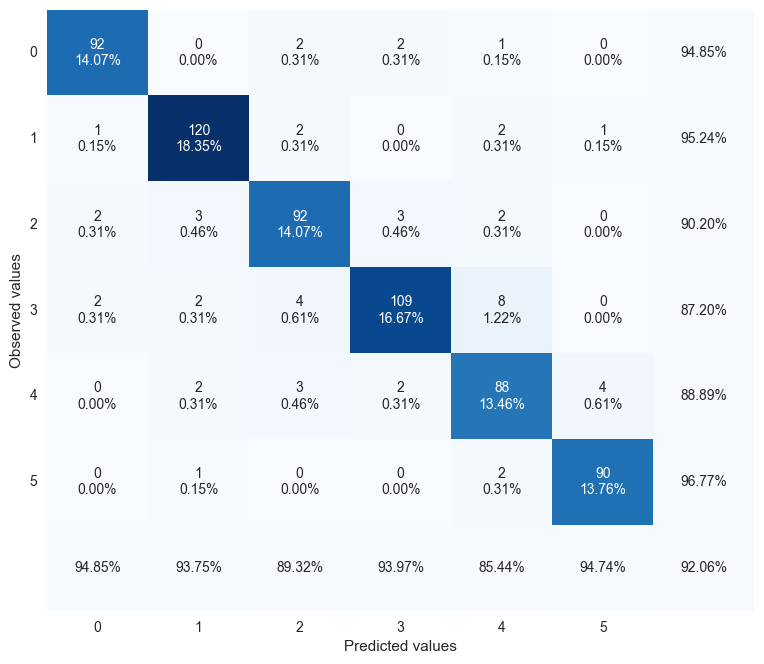

In [64]:
# 绘制混淆矩阵的可视化图表。
classifier.plot_confusion_matrix()

In [65]:
# 查看模型在训练集上的混淆矩阵。
classifier.confusion_matrix(test=False)

Predicted values                                    recall
                                 0      1      2      3      4      5       
Observed values 0            353.0    0.0    0.0    0.0    0.0    0.0    1.0
                1              0.0  531.0    0.0    0.0    0.0    0.0    1.0
                2              0.0    0.0  408.0    0.0    0.0    0.0    1.0
                3              0.0    0.0    0.0  430.0    0.0    0.0    1.0
                4              0.0    0.0    0.0    0.0  491.0    0.0    1.0
                5              0.0    0.0    0.0    0.0    0.0  354.0    1.0
precision                      1.0    1.0    1.0    1.0    1.0    1.0    1.0

In [66]:
# 查看分类报告，包括精确率（precision）、召回率（recall）和 F1 分数。
classifier.classification_report()

,precision,recall,f1-score,support
0,0.948454,0.948454,0.948454,97.000000
1,0.937500,0.952381,0.944882,126.000000
2,0.893204,0.901961,0.897561,102.000000
3,0.939655,0.872000,0.904564,125.000000
4,0.854369,0.888889,0.871287,99.000000
5,0.947368,0.967742,0.957447,93.000000
accuracy,0.920561,0.920561,0.920561,0.920561
macro avg,0.920092,0.921904,0.920699,642.000000
weighted avg,0.921147,0.920561,0.920525,642.000000


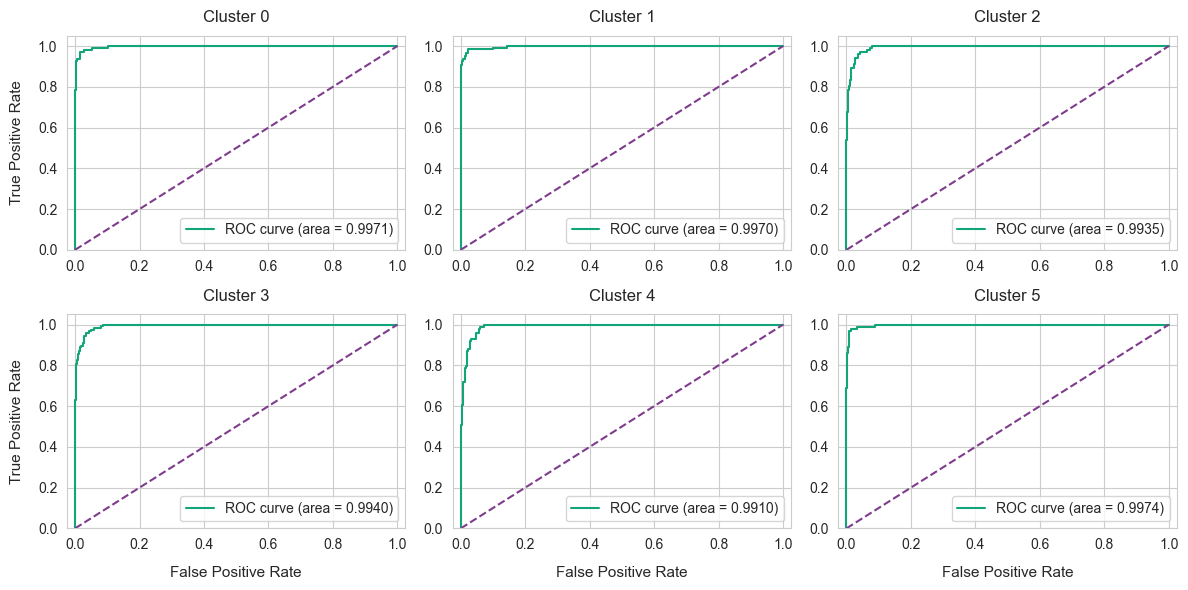

In [67]:
# 绘制模型的 ROC 曲线，评估分类性能
classifier.plot_roc_curves()

### 2.3. Model explainability 模型可解释性

#### 2.3.1. Global feature importance 全局特征重要性

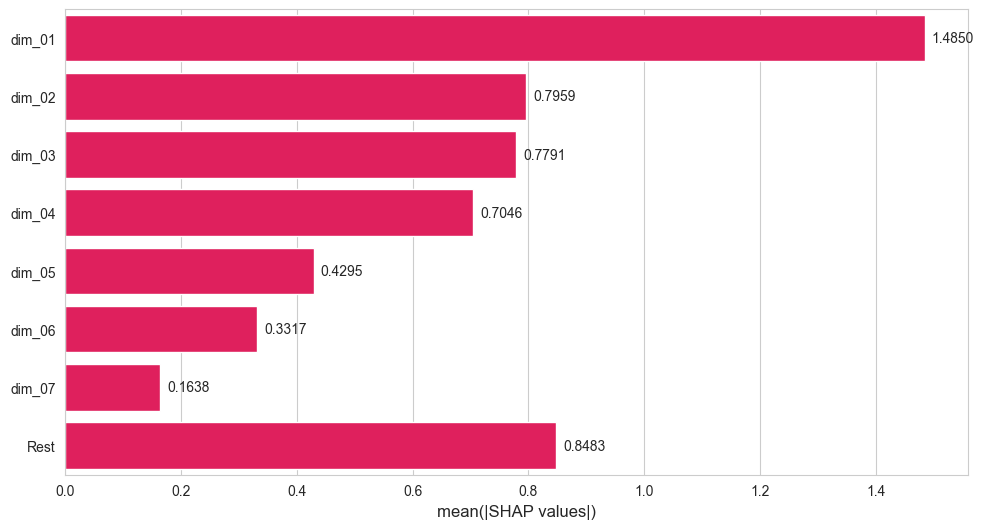

In [68]:
# 使用 SHAP（SHapley Additive exPlanations）方法绘制全局特征重要性。
classifier.plot_shap_importances()

#### 2.3.2. Detailed feature importance by class (cluster label)

按类别（聚类标签）的详细特征重要性。

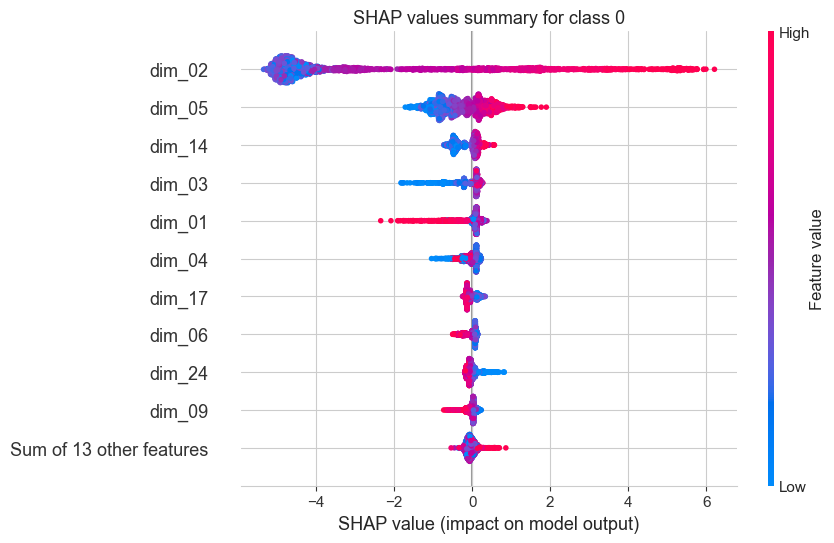

In [69]:
classifier.plot_shap_importances_beeswarm(class_id=0)

绘制类别 0 的特征重要性...


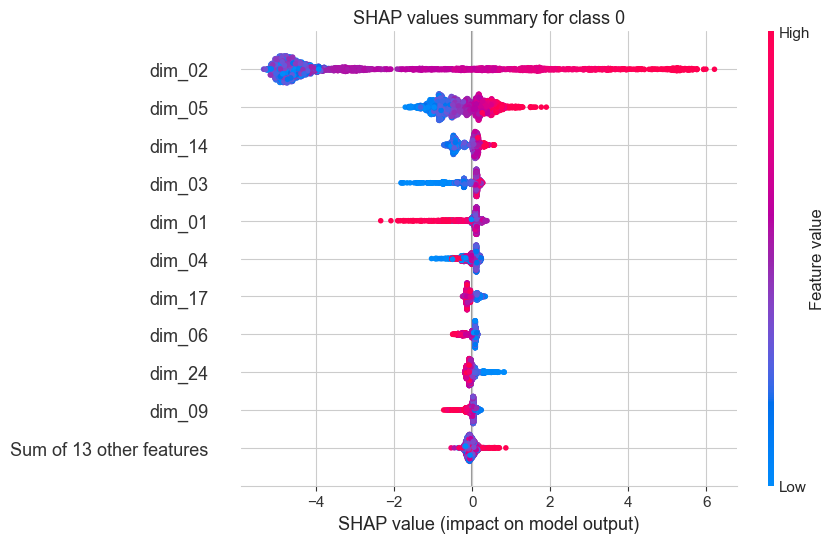

绘制类别 1 的特征重要性...


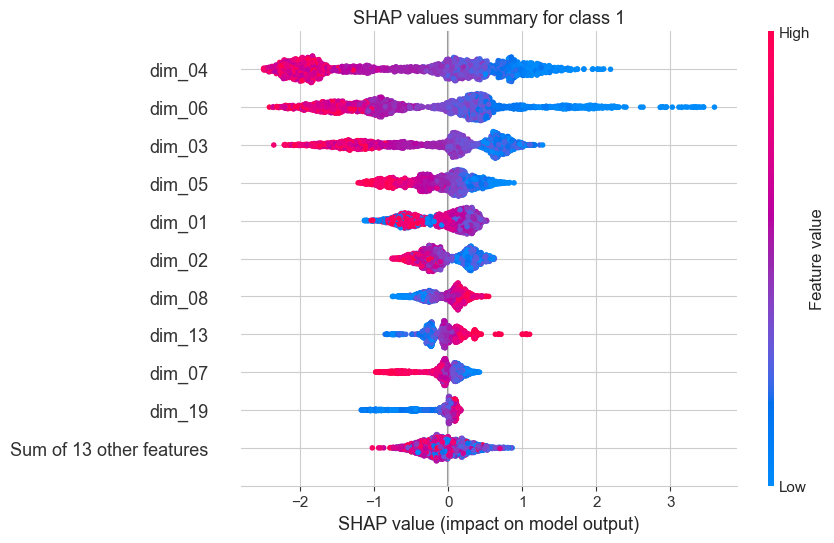

绘制类别 2 的特征重要性...


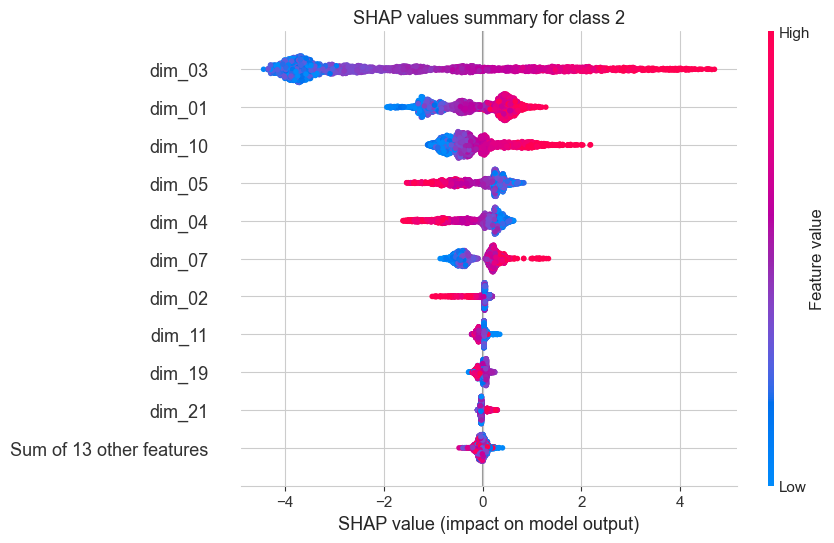

绘制类别 3 的特征重要性...


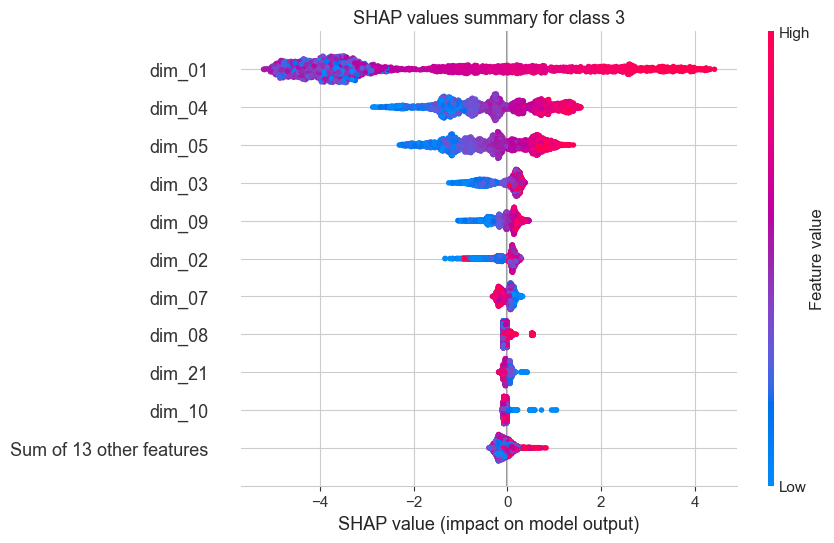

绘制类别 4 的特征重要性...


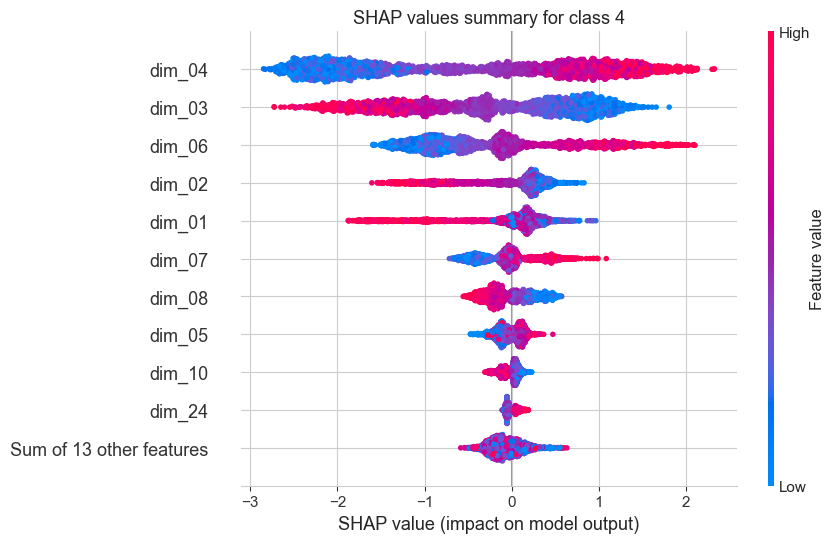

绘制类别 5 的特征重要性...


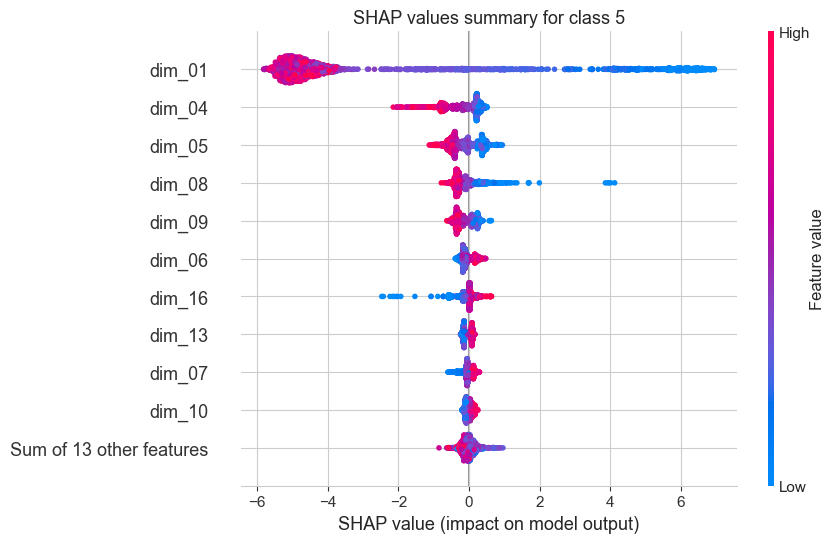

In [70]:
# 使用 SHAP 方法绘制指定类别（如 class_id=0）的特征重要性。
# 获取所有类别的唯一值
from matplotlib import pyplot as plt
all_classes = df_red['cluster'].unique()

# 按顺序绘制特征重要性
for class_id in sorted(all_classes):
    print(f"绘制类别 {class_id} 的特征重要性...")
    classifier.plot_shap_importances_beeswarm(class_id=class_id)
    plt.show()  # 确保每个图表单独显示
    

## Reproduciblity check 可重复性检查。

In [71]:
# 导出预测结果 使用训练好的模型对数据进行预测，并将结果保存到 CSV 文件中。
final = classifier.df[classifier.filtered_features_ + ['cluster']].copy()
final['cluster_pred'] = classifier.model_.predict(classifier.df[classifier.filtered_features_])
final.to_csv('data_HKG/data_香港_modified_dimred_vars_classification_output.csv', index=False)

In [72]:
# 比较预测结果 加载参考结果，并与当前结果进行比较，检查维度和预测是否一致。
df_ref = pd.read_csv('data_HKG/data_香港_modified_dimred_vars_classification_output.csv')

print('Diff in dimension', np.abs(df_ref.shape[1] - final.shape[1]))
print('Diff in prediction', (df_ref['cluster_pred'] != final['cluster_pred']).sum())

Diff in dimension 0
Diff in prediction 0


## 3. Classification using the original variables as predictors

使用原始变量作为预测因子进行分类。

First, we separate numerical from categorical variables.

首先，我们将数值变量与分类变量区分开来。

In [73]:
num_vars = ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ['ITSEX', 'ASRIBM', 'ASBG03', 'ASBG05A', 'ASBG05B', 'ASBG05E', 'ASBG05F', 'ASBG05G', 'ASBG05H', 'ASBG05I', 'ASBG05J', 'ASBG05K', 'ASBG06', 'ASBG07A', 'ASBG07B', 'ASBG08A', 'ASBG08B', 'ASBG10F', 'ASBR03A', 'ASBR03B', 'ASBR03C', 'ASBR04', 'ASBR05', 'ASDGSEC', 'ASDGSSB', 'ASDGSB', 'ASDGERL', 'ASDGDRL', 'ASDGSLR', 'ASDGSCR', 'ASDG05S', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH03B', 'ASBH03C', 'ASBH03D', 'ASBH03E', 'ASBH04', 'ASBH06', 'ASBH07F', 'ASBH09', 'ASBH14A', 'ASBH14B', 'ASBH14C', 'ASBH16', 'ASBH18AA', 'ASBH18AB', 'ASBH18BA', 'ASBH18BB', 'ASBH18CA', 'ASBH18CB', 'ASBH18DA', 'ASBH18DB', 'ASBH18EA', 'ASBH18EB', 'ASBH19', 'ASBH20A', 'ASBH20B', 'ASBH20C', 'ASBH21A', 'ASBH21B', 'ASBH21C', 'ASBH21D', 'ASBH22', 'ASDGHRL', 'ASDHSES', 'ASDHELA', 'ASDHENA', 'ASDHELN', 'ASDHELT', 'ASDHPCS', 'ASDHPLR', 'ASDHAPS', 'ASDHEDUP', 'ASDHOCCP', 'ACBG04', 'ACBG05A', 'ACBG05B', 'ACBG07B', 'ACBG07C', 'ACBG08', 'ACBG13', 'ACBG14A', 'ACBG14B', 'ACBG14C', 'ACBG14D', 'ACBG14E', 'ACBG14F', 'ACBG14G', 'ACBG14H', 'ACBG14I', 'ACBG14J', 'ACBG14K', 'ACBG14L', 'ACBG14M', 'ACBG14N', 'ACBG17', 'ACBG18A', 'ACBG18B', 'ACBG18C', 'ACBG19', 'ACBG20', 'ACBG21A', 'ACBG21B', 'ACBG21C', 'ACBG21D', 'ACBG21E', 'ACBG21F', 'ACDGRRS', 'ACDGEAS', 'ACDGDAS', 'ACDGSBC', 'ATBG02', 'ATBG03', 'ATBG05AA', 'ATBG05AB', 'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA', 'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBR06A', 'ATBR06B', 'ATBR06C', 'ATBR06D', 'ATBR06E', 'ATBR07AA', 'ATBR07AB', 'ATBR07AC', 'ATBR07AD', 'ATBR07BA', 'ATBR07BB', 'ATBR07BC', 'ATBR07BD', 'ATBR08A', 'ATBR08B', 'ATBR08C', 'ATBR08D', 'ATBR08E', 'ATBR08F', 'ATBR08G', 'ATBR08H', 'ATBR09A', 'ATBR09B', 'ATBR09C', 'ATBR09D', 'ATBR09E', 'ATBR09F', 'ATBR09G', 'ATBR09H', 'ATBR09I', 'ATBR10A', 'ATBR10B', 'ATBR10C', 'ATBR10D', 'ATBR10E', 'ATBR10F', 'ATBR10G', 'ATBR10H', 'ATBR10I', 'ATBR10J', 'ATBR10K', 'ATBR10L', 'ATBR11A', 'ATBR11B', 'ATBR11C', 'ATBR11D', 'ATBR11E', 'ATBR12A', 'ATBR12BA', 'ATBR12BB', 'ATBR12BC', 'ATBR12BD', 'ATBR12C', 'ATBR12DA', 'ATBR12DB', 'ATBR12DC', 'ATBR12EA', 'ATBR12EB', 'ATBR12EC', 'ATBR12ED', 'ATBR12EE', 'ATBR13A', 'ATBR13B', 'ATBR13C', 'ATBR13D', 'ATBR13E', 'ATBR14', 'ATBR15', 'ATBR16', 'ATBR17A', 'ATBR17B', 'ATBR17C', 'ATBR18A', 'ATBR18B', 'ATBR18C', 'ATBR18D', 'ATBR18E', 'ATBR19', 'ATDGEAS', 'ATDGSOS', 'ATDGTJS', 'ATDGSLI']

### 3.1. Class instantiation and model fitting 类实例化和模型拟合

In [74]:

# 使用原始数据初始化分类器。
classifier = Classifier(df, list(df.columns[:-2]),  df['cluster'], num_cols=num_vars, cat_cols=cat_vars)

In [75]:
np.random.seed(42)

In [76]:

# 数值变量	ATBGEAS	    学校强调学术成功-教师/量表
# 分类变量	ATDGEAS	    学校强调学术成功-教师/指数
# 数值变量	ATBGSOS	    安全有序学校-教师/量表
# 分类变量	ATDGSOS	    安全有序学校-教师/指数
# 数值变量	ATBGTJS	    教师工作满意度/量表
# 分类变量	ATDGTJS	    教师工作满意度/指数
# 数值变量	ATBGSLI	    教学因学生未准备好受限/量表
# 分类变量	ATDGSLI	    教学因学生未准备好受限/指数
# 数值变量	ATDGLIHY    每年语言教学小时数
# 数值变量	ATDGRIHY	每年阅读教学小时数


# ['ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
# ['ATDGEAS', 'ATDGSOS','ATDGTJS',  'ATDGSLI']
# ['ATBGEAS', 'ATDGEAS','ATBGSOS', 'ATDGSOS','ATBGTJS','ATDGTJS', 'ATBGSLI', 'ATDGSLI','ATDGLIHY', 'ATDGRIHY']

# 使用指定的特征训练分类模型，并进行超参数调优。
classifier.train_model(features_to_keep=[
    "ASRREA",
    # "ASDGSEC", "ASDGSSB", "ASDGSB", "ASDGERL","ASDGDRL", "ASDGSLR", "ASDGSCR", 
    "ASBGSEC", "ASBGSSB", "ASBGSB", "ASBGERL", "ASBGDRL", "ASBGSLR", "ASBGSCR",
# "ASDG05S", 
    # "ASDGHRL", "ASDHSES", 
    "ASBGHRL", "ASBHSES",
# "ASDHELA", "ASDHENA",
# "ASBHELA", "ASBHENA",
    # "ASDHELN",
    "ASBHELN",
    # "ASDHELT","ASDHPCS", "ASDHPLR",
    "ASBHELT", "ASBHPCS", "ASBHPLR",
    "ASDHAPS", 
# "ASDHEDUP", "ASDHOCCP", 
    # "ACDGRRS", "ACDGEAS", "ACDGDAS", "ACDGSBC", "ATDGEAS", "ATDGSOS", "ATDGTJS", "ATDGSLI",
    "ACBGRRS", "ACBGEAS", "ACBGDAS", "ACDGTIHY","ATBGEAS", "ATBGSOS", "ATBGTJS", "ATBGSLI", 
    "ATDGLIHY", "ATDGRIHY"
    ],
    hyperparameter_tuning=True, param_grid=dict(n_estimators=[30, 60], eta=[0.15, 0.25], max_depth=[3, 5, 7, 9]))

2025-04-27 21:54:28 INFO     clearn.classifier.classifier: Running feature selection...
2025-04-27 21:55:48 WARNING  clearn.classifier.utils: Variables ASBGHRL and ASBHSES are highly correlated, and both were selected to be kept.
2025-04-27 21:55:48 WARNING  clearn.classifier.utils: Variables ASBHSES and ASBGHRL are highly correlated, and both were selected to be kept.
2025-04-27 22:00:16 INFO     clearn.classifier.classifier: Running hyperparameter tuning...
2025-04-27 22:00:22 INFO     clearn.classifier.classifier: Training model...
2025-04-27 22:00:22 INFO     clearn.classifier.classifier: DONE!


In [77]:

# classifier.feature_importances

# 获取五个最重要特征的全局特征重要性 打印特征重要性
# Get global feature importance of the five most important features
print("前几个最重要特征的全局特征重要性:\n", classifier.feature_importances.head(10))
# 获取最重要特征的全局特征重要性 打印特征重要性，保存结果
classifier.feature_importances.to_csv('data_HKG/data_香港_modified_全局特征重要性.csv', index=False)
print("已完成，全局特征重要性，结果保存。")

前几个最重要特征的全局特征重要性:
   variable_name  shap_importance
0        ASRREA         1.188093
1       ASBHELN         0.620606
2       ATBR01B         0.524901
3       ASBGSSB         0.253563
4       ASBGERL         0.250005
5       ACBGEAS         0.235139
6       ASBHSES         0.198298
7       ASBGSCR         0.197795
8       ASBGSLR         0.197576
9       ASBGHRL         0.186438
已完成，全局特征重要性，结果保存。


In [78]:
# "筛选后的特征数量:"
# len(classifier.filtered_features_)
# 查看经过特征选择后保留的特征数量。
print("筛选后的特征数量:", len(classifier.filtered_features_), "\n筛选后的特征:", classifier.filtered_features_)


筛选后的特征数量: 40 
筛选后的特征: [np.str_('ASRREA'), np.str_('ASBGSEC'), np.str_('ASBGSSB'), np.str_('ASBGSB'), np.str_('ASBGERL'), np.str_('ASBGDRL'), np.str_('ASBGSLR'), np.str_('ASBGSCR'), np.str_('ASBGHRL'), np.str_('ASBHSES'), np.str_('ASBHELN'), np.str_('ASBHELT'), np.str_('ASBHPCS'), np.str_('ASBHPLR'), np.str_('ACBG09'), np.str_('ACBG15'), np.str_('ACBG16'), np.str_('ACBGRRS'), np.str_('ACBGEAS'), np.str_('ACDGTIHY'), np.str_('ATBG01'), np.str_('ATBR01B'), np.str_('ATBR02B'), np.str_('ATBGEAS'), np.str_('ATBGSOS'), np.str_('ATBGTJS'), np.str_('ATBGSLI'), np.str_('ATDGLIHY'), np.str_('ATDGRIHY'), np.str_('ACBG14K'), np.str_('ACBG14M'), np.str_('ATBG05BB'), np.str_('ATBR07AB'), np.str_('ATBR07BB'), np.str_('ATBR08D'), np.str_('ATBR09H'), np.str_('ATBR12C'), np.str_('ATBR12DC'), np.str_('ATBR13D'), np.str_('ATBR14')]


### 3.2. Model performance 模型性能

In [79]:
# 与降维数据的分类类似，使用相同的方法评估模型性能并分析特征重要性
# classifier.hyperparameter_tuning_metrics()

print("超参数调优结果:\n", classifier.hyperparameter_tuning_metrics()) # 打印超参数调优结果
# 查看模型超参数调优结果。保存结果
classifier.confusion_matrix().to_csv('data_HKG/data_香港_modified_超参数调优结果.csv', index=False)
print("已完成，模型超参数调优结果，结果保存。")

超参数调优结果:
    XGBClassifier Hyperparameters                        Performance metrics  \
                             eta max_depth n_estimators     mean_test_score   
0                           0.15         3           30            0.817683   
1                           0.15         3           60            0.842226   
2                           0.15         5           30            0.831706   
3                           0.15         5           60            0.848067   
4                           0.15         7           30            0.821967   
5                           0.15         7           60            0.836381   
6                           0.15         9           30            0.816902   
7                           0.15         9           60            0.833264   
8                           0.25         3           30            0.838718   
9                           0.25         3           60            0.857026   
10                          0.25         5

In [80]:
# 查看训练好的模型对象。
print("训练好的模型对象:\n", classifier.model_) # 打印训练好的模型对象

# 查看训练好的模型对象的参数。
print("训练好的模型对象的参数:\n", classifier.model_.get_params()) # 打印训练好的模型对象的参数


训练好的模型对象:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=None, num_parallel_tree=None, ...)
训练好的模型对象的参数:
 {'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categori

In [81]:


# 查看模型在测试集上的混淆矩阵。
print("模型在测试集上的混淆矩阵\n", classifier.confusion_matrix())
# 查看模型在测试集上的混淆矩阵。保存结果
classifier.confusion_matrix().to_csv('data_HKG/data_香港_modified_模型在测试集上的混淆矩阵.csv', index=False)
print("已完成，模型在测试集上的混淆矩阵，结果保存。")



模型在测试集上的混淆矩阵
                   Predicted values                                     \
                                 0           1          2           3   
Observed values 0        85.000000    3.000000   3.000000    4.000000   
                1         2.000000  115.000000   0.000000    2.000000   
                2         3.000000    2.000000  85.000000    6.000000   
                3         5.000000    2.000000   4.000000  106.000000   
                4         1.000000    3.000000   3.000000    6.000000   
                5         0.000000    4.000000   3.000000    0.000000   
precision                 0.885417    0.891473   0.867347    0.854839   

                                           recall  
                           4          5            
Observed values 0   1.000000   1.000000  0.876289  
                1   2.000000   5.000000  0.912698  
                2   4.000000   2.000000  0.833333  
                3   8.000000   0.000000  0.848000  
                

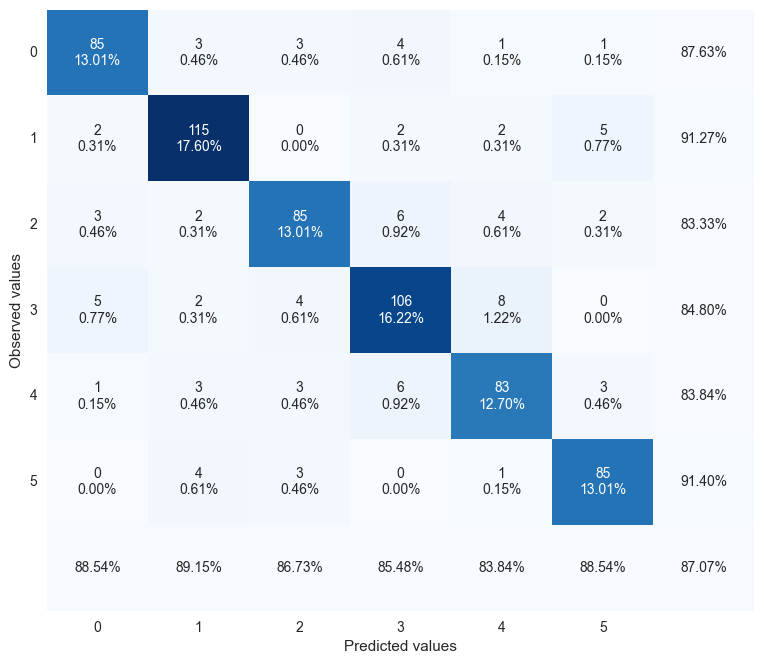

In [82]:
classifier.plot_confusion_matrix()

In [83]:
# classifier.confusion_matrix()
# test:默认=True,如果为True，返回在测试集上计算的混淆矩阵。如果为False，返回在训练集上的混淆矩阵。
# 查看模型在训练集上的混淆矩阵。
print("模型在训练集上的混淆矩阵\n", classifier.confusion_matrix(test=False))
# 查看模型在训练集上的混淆矩阵。保存结果
classifier.confusion_matrix(test=False).to_csv('data_HKG/data_香港_modified_模型在训练集上的混淆矩阵.csv', index=False)
print("已完成，模型在训练集上的混淆矩阵，结果保存。")

# classifier.confusion_matrix(test=False)



模型在训练集上的混淆矩阵
                   Predicted values                                      \
                                 0           1           2           3   
Observed values 0       350.000000    1.000000    1.000000    1.000000   
                1         0.000000  530.000000    0.000000    0.000000   
                2         1.000000    0.000000  407.000000    0.000000   
                3         3.000000    2.000000    0.000000  422.000000   
                4         1.000000    0.000000    0.000000    2.000000   
                5         0.000000    2.000000    0.000000    0.000000   
precision                 0.985915    0.990654    0.997549    0.992941   

                                             recall  
                            4           5            
Observed values 0    0.000000    0.000000  0.991501  
                1    0.000000    1.000000  0.998117  
                2    0.000000    0.000000  0.997549  
                3    3.000000    0.000000  0.9813

In [84]:
# classifier.classification_report()

# Classification report # # 打印分类报告 包括精确率（precision）、召回率（recall）和 F1 分数，support 列表示每个类别的样本数量（总样本数）
print("分类报告:\n", classifier.classification_report())
# 查看模型分类报告。保存结果
classifier.classification_report().to_csv('data_HKG/data_香港_modified_分类报告.csv', index=False)
print("已完成，模型分类报告，结果保存。")

分类报告:
               precision    recall  f1-score     support
0              0.885417  0.876289  0.880829   97.000000
1              0.891473  0.912698  0.901961  126.000000
2              0.867347  0.833333  0.850000  102.000000
3              0.854839  0.848000  0.851406  125.000000
4              0.838384  0.838384  0.838384   99.000000
5              0.885417  0.913978  0.899471   93.000000
accuracy       0.870717  0.870717  0.870717    0.870717
macro avg      0.870479  0.870447  0.870342  642.000000
weighted avg   0.870528  0.870717  0.870505  642.000000
已完成，模型分类报告，结果保存。


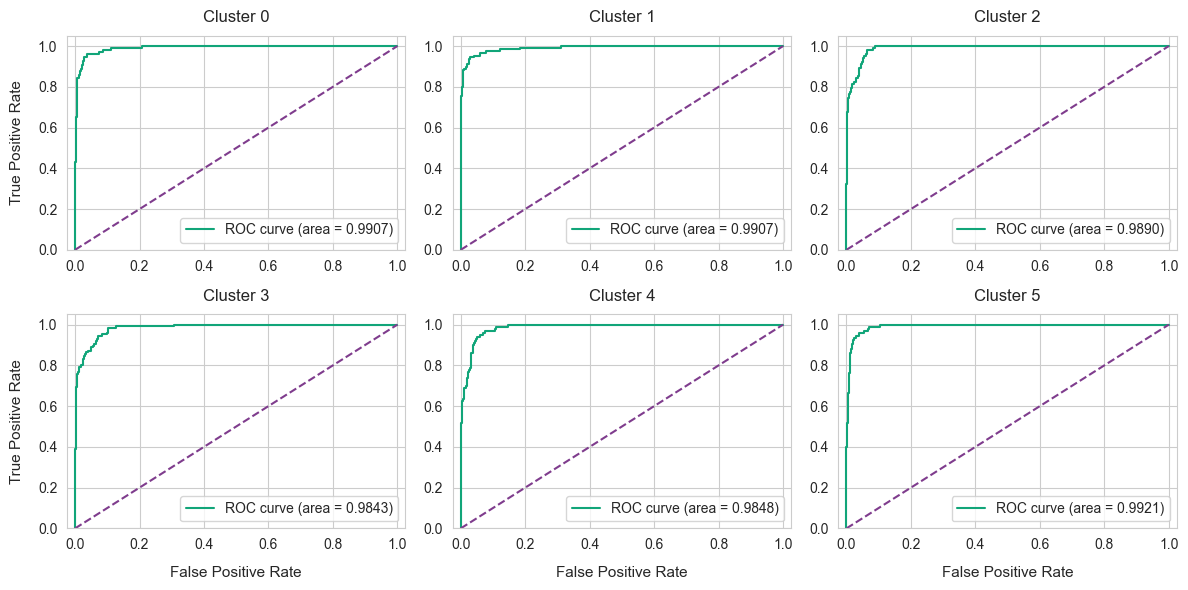

In [85]:
classifier.plot_roc_curves() # ROC curves # ROC 曲线 评估分类性能

### 3.3. Model explainability 模型可解释性

#### 3.3.1. Global feature importance 全局特征重要性

In [86]:
# Get global feature importance of the five most important features
print("前几个最重要特征的全局特征重要性:\n", classifier.feature_importances.head(10))
# 获取最重要特征的全局特征重要性 打印特征重要性，保存结果
classifier.feature_importances.to_csv('data_HKG/data_香港_modified_全局特征重要性.csv', index=False)
print("已完成，全局特征重要性，结果保存。")

前几个最重要特征的全局特征重要性:
   variable_name  shap_importance
0        ASRREA         1.188093
1       ASBHELN         0.620606
2       ATBR01B         0.524901
3       ASBGSSB         0.253563
4       ASBGERL         0.250005
5       ACBGEAS         0.235139
6       ASBHSES         0.198298
7       ASBGSCR         0.197795
8       ASBGSLR         0.197576
9       ASBGHRL         0.186438
已完成，全局特征重要性，结果保存。


已完成全局特征重要性图生成


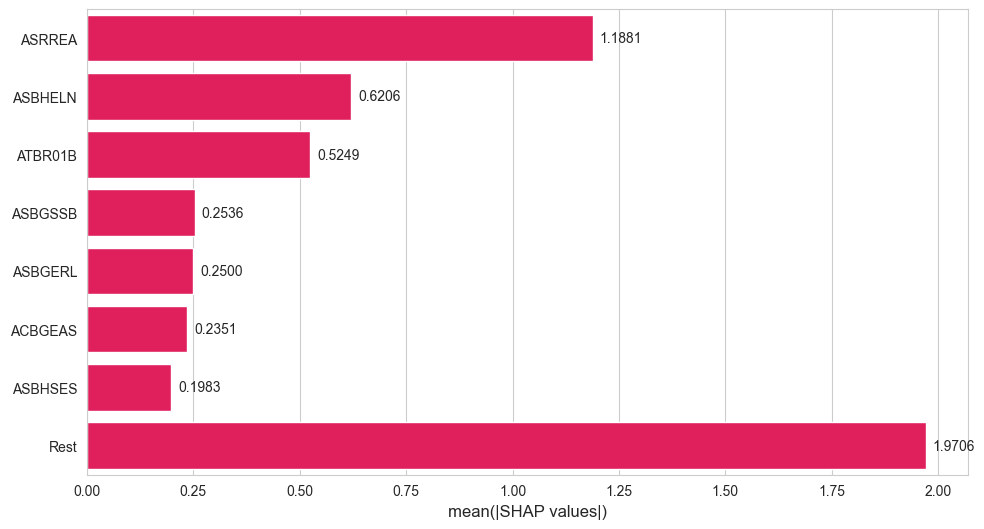

In [87]:
classifier.plot_shap_importances()

# classifier.plot_shap_importances(output_path=os.path.join("img_MAC", "全局特征重要性图classifier_global_feature_importance.jpg"))
# plt.clf()
print("已完成全局特征重要性图生成")

#### 3.3.2. Detailed feature importance by class (cluster label)

按类别（聚类标签）的详细特征重要性

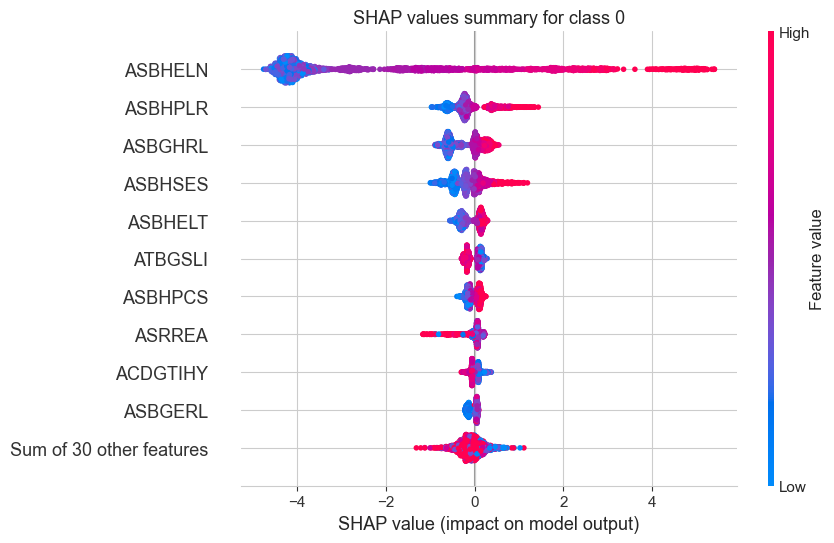

In [88]:
classifier.plot_shap_importances_beeswarm(class_id=0) #, output_path='PATH.jpg')

绘制类别 0 的特征重要性...


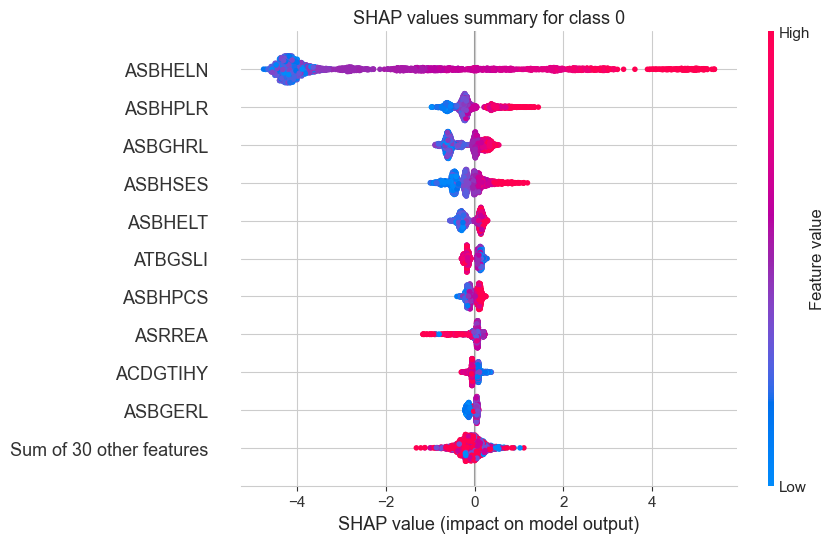

绘制类别 1 的特征重要性...


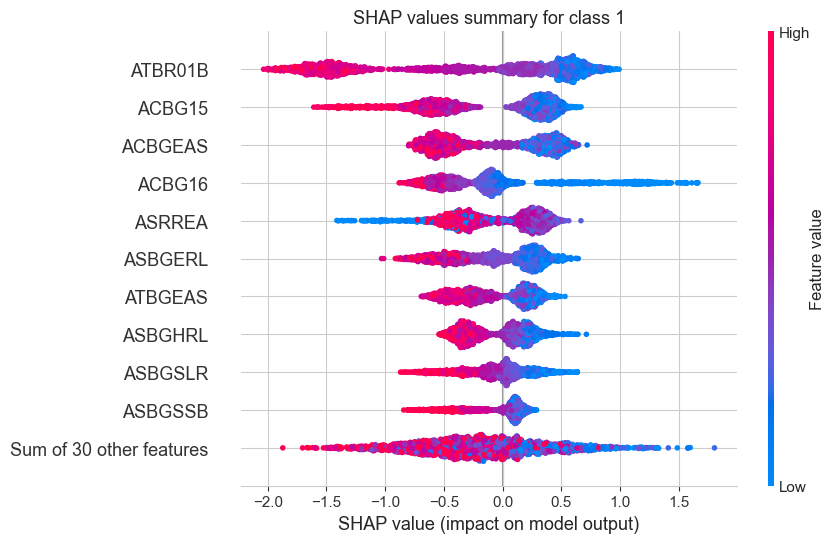

绘制类别 2 的特征重要性...


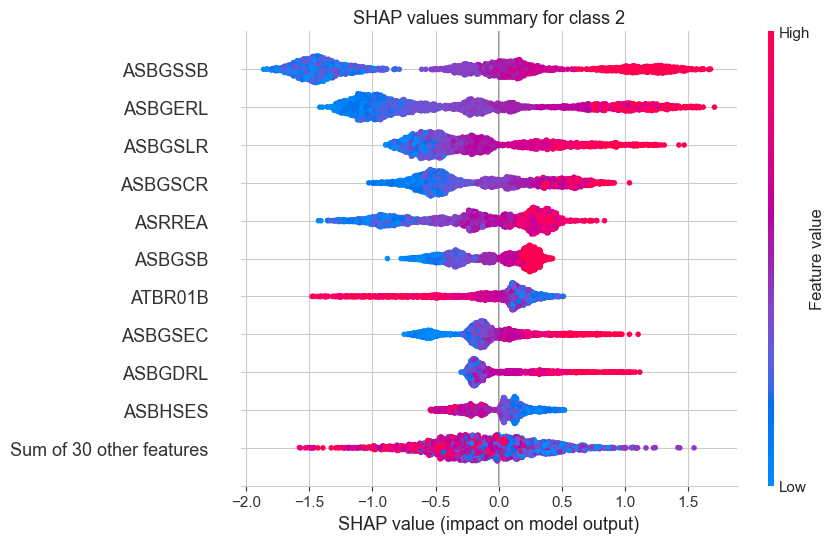

绘制类别 3 的特征重要性...


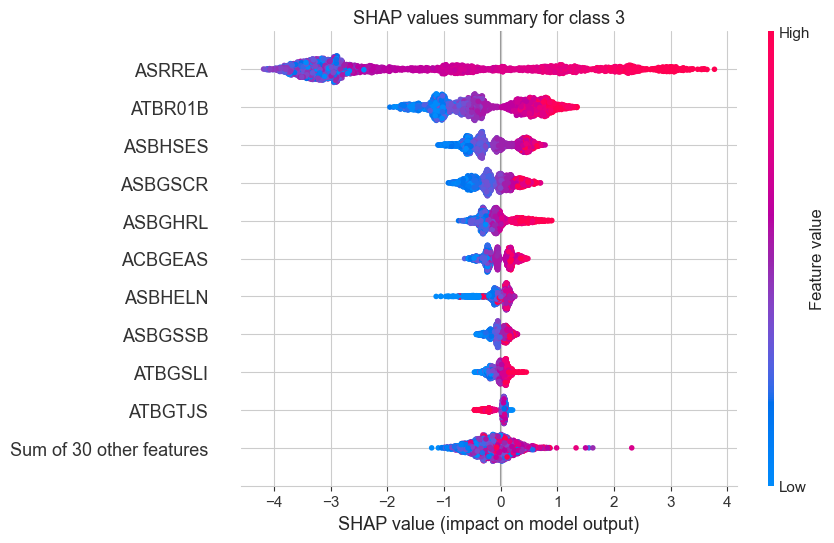

绘制类别 4 的特征重要性...


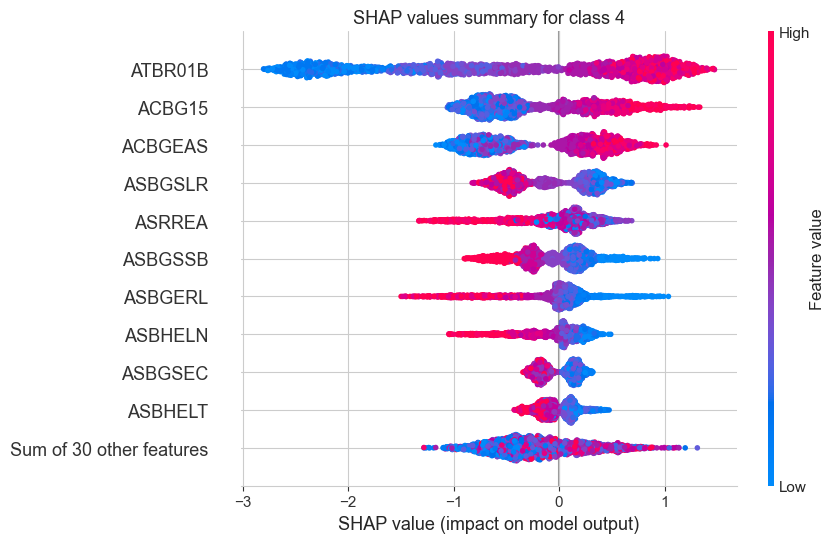

绘制类别 5 的特征重要性...


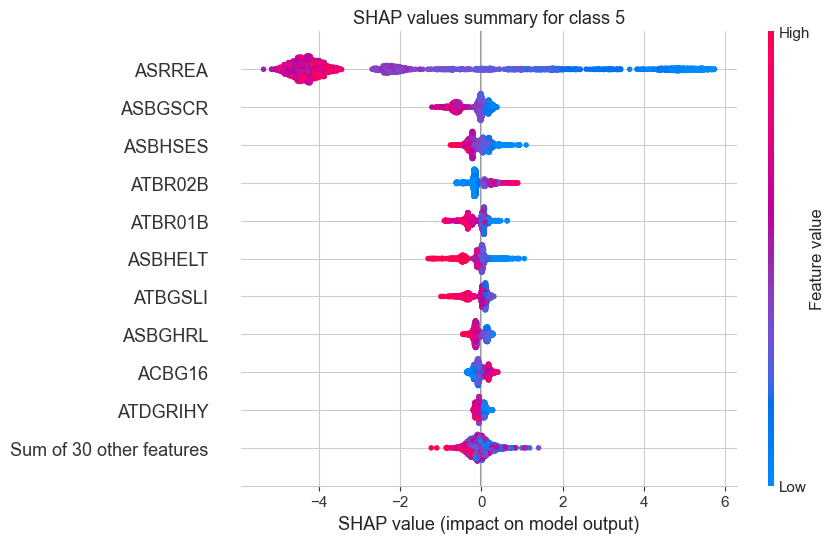

In [89]:
# 使用 SHAP 方法绘制指定类别（如 class_id=0）的特征重要性。
# 获取所有类别的唯一值
from matplotlib import pyplot as plt
all_classes = df['cluster'].unique()

# 按顺序绘制特征重要性
for class_id in sorted(all_classes):
    print(f"绘制类别 {class_id} 的特征重要性...")
    classifier.plot_shap_importances_beeswarm(class_id=class_id)
    plt.show()  # 确保每个图表单独显示
    

## Repreoducibility check 可重复性检查

In [90]:
final = classifier.df[classifier.filtered_features_ + ['cluster']].copy()
final['cluster_pred'] = classifier.model_.predict(classifier.df[classifier.filtered_features_])
final.to_csv('data_HKG/data_香港_modified_original_vars_classification_output.csv', index=False)

In [91]:
df_ref = pd.read_csv('data_HKG/data_香港_modified_original_vars_classification_output.csv')

print('Diff in dimension', np.abs(df_ref.shape[1] - final.shape[1]))
print('Diff in prediction', (df_ref['cluster_pred'] != final['cluster_pred']).sum())

Diff in dimension 0
Diff in prediction 0
